In [ ]:
!pip install autoviml

     |████████████████████████████████| 133kB 26.8MB/s 
     |████████████████████████████████| 133kB 41.4MB/s 
     |████████████████████████████████| 133kB 52.1MB/s 
     |████████████████████████████████| 67.3MB 42kB/s 
     |████████████████████████████████| 358kB 52.3MB/s 
     |████████████████████████████████| 215kB 44.5MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
     |████████████████████████████████| 166.7MB 78kB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=540254631da4f87f3ee7894e0b23a76e2fd2f05da24ecd35dff82a6fa418108e
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Succ

In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loanpred_train.csv to loanpred_train.csv


In [ ]:
df = pd.read_csv('loanpred_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1 ,'N':0})

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
size = int(0.7*df.shape[0])
train_df = df[:size]
test_df = df[size:]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(429, 13)
(185, 13)


In [ ]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.681. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [ ]:
target='Loan_Status'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (429, 13)
    Training Set Memory Usage = 0.04 MB
Test Set Shape = (185, 13)
    Test Set Memory Usage = 0.02 MB
Single_Label Target: ['Loan_Status']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:     135  ->   31.5%
           1:     294  ->   68.5%
    Target Loan_Status is already numeric. No transformation done.
Alert! Rare Class is not 1 but 0 in this data set
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String

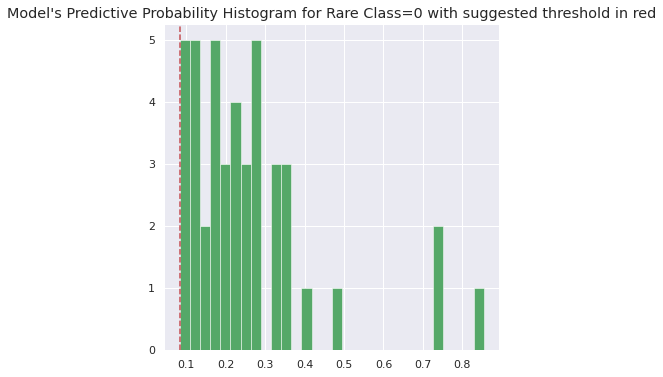

    Using threshold=0.5. However, 0.083 provides better F1=0.81 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 32.6%
Balanced Accuracy = 60.71% with Threshold = 0.50
Confusion Matrix:
[[ 3 11]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.72      1.00      0.84        29

    accuracy                           0.74        43
   macro avg       0.86      0.61      0.60        43
weighted avg       0.81      0.74      0.68        43

Balanced Accuracy = 50.00% with Threshold = 0.08
Confusion Matrix:
[[14  0]
 [29  0]]
              precision    recall  f1-score   support

           0       0.33      1.00      0.49        14
           1       0.00      0.00      0.00        29

    accuracy                           0.33        43
   macro avg       0.16      0.50      0.25        

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 32.6%
    Balanced Accuracy = 50.0%
    Precision         = 0.0%
    Average Precision = 16.3%
    Recall            = 0.0%
    F1 Score          = 0.0%
#####################################################
              precision    recall  f1-score   support

           0       0.33      1.00      0.49        14
           1       0.00      0.00      0.00        29

    accuracy                           0.33        43
   macro avg       0.16      0.50      0.25        43
weighted avg       0.11      0.33      0.16        43

[[14  0]
 [29  0]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


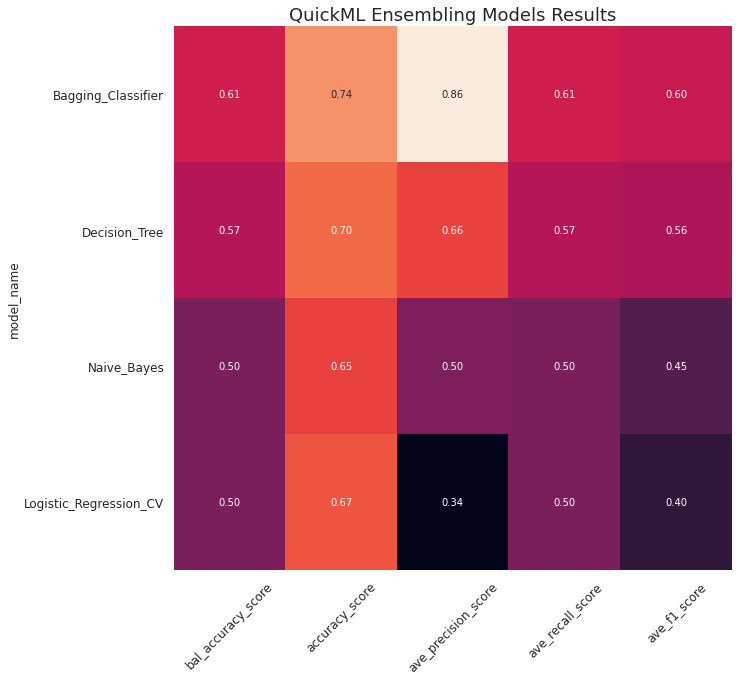

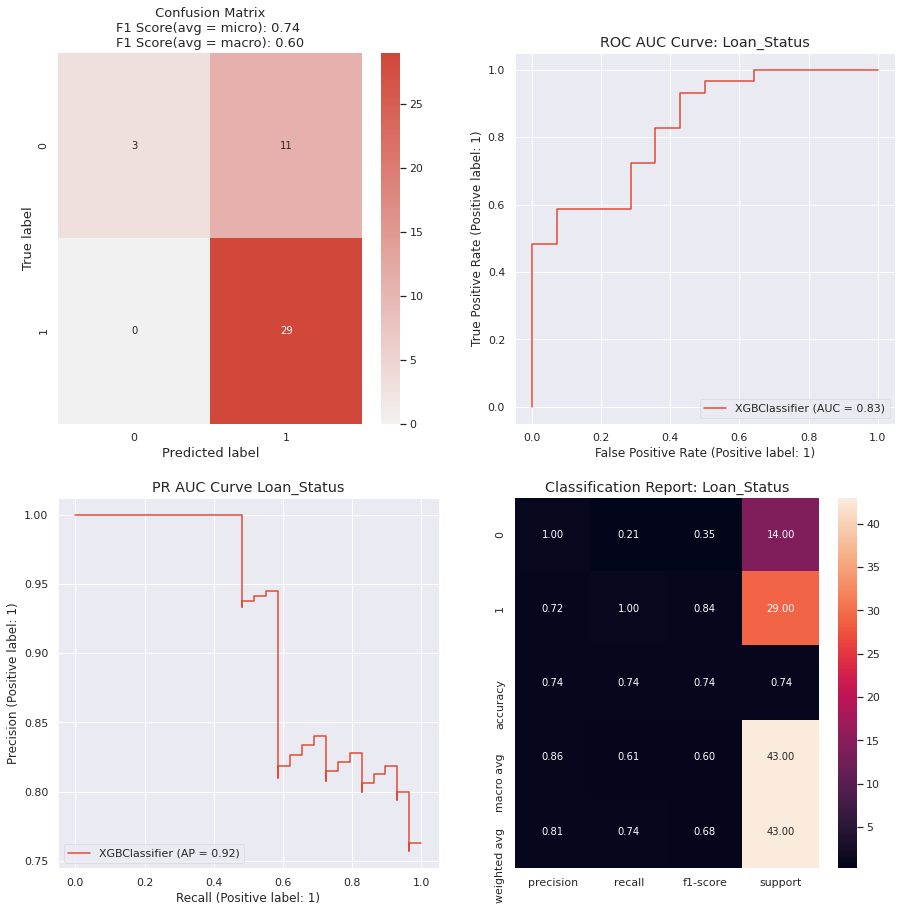

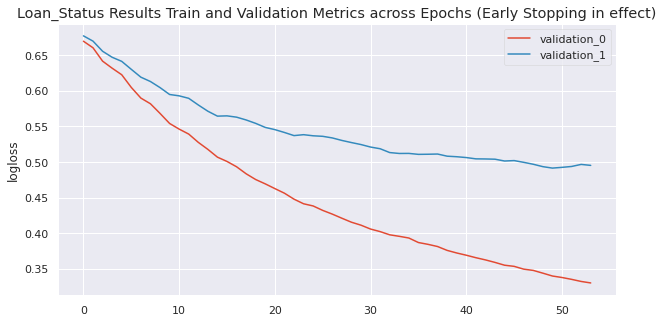

    Time taken for this Target (in seconds) = 210
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.083
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 211
Writing Output files to disk...
    Saving predictions to ./Loan_Status/Loan_Status_Binary_Classification_test_modified.csv
    Saving predictions to ./Loan_Status/Loan_Status_Binary_Classification_submission.csv
    Saving predictions to ./Loan_Status/Loan_Status_Binary_Classification_t

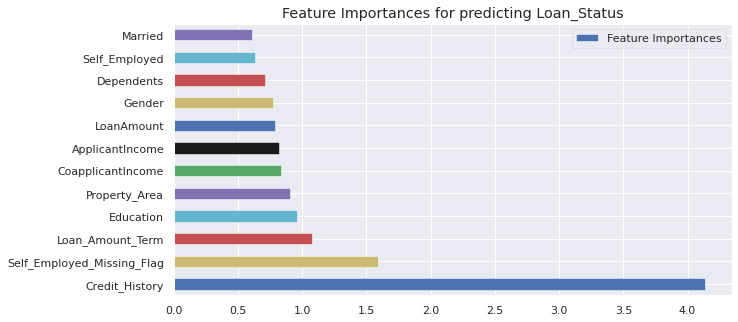

In [ ]:

model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [16]:
features

['Credit_History',
 'Self_Employed_Missing_Flag',
 'Property_Area',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Education',
 'Loan_Amount_Term',
 'LoanAmount',
 'Gender',
 'Dependents',
 'Self_Employed',
 'Married',
 'Loan_Amount_Term_Missing_Flag',
 'LoanAmount_Missing_Flag']

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
testm

,Loan_ID,Credit_History,Self_Employed_Missing_Flag,Property_Area,ApplicantIncome,CoapplicantIncome,Education,Loan_Amount_Term,LoanAmount,Gender,Dependents,Self_Employed,Married,Loan_Amount_Term_Missing_Flag,LoanAmount_Missing_Flag,Loan_Status_proba_0,Loan_Status_proba_1,Loan_Status_predictions,Loan_Status_Logistic_Regression_CV_predictions,Loan_Status_Decision_Tree_predictions,Loan_Status_Naive_Bayes_predictions,Loan_Status_Bagging_Classifier_predictions,Loan_Status_XGBoost_predictions,Loan_Status_Ensembled_predictions
429,LP002370,1.00,0.00,1.00,0.03,0.00,1.00,0.33,0.06,1.00,0.25,0.50,0.50,0.00,0.00,0.32,0.68,0.00,1,1,1,1,0.00,0
430,LP002377,1.00,0.00,0.50,0.10,0.00,0.00,0.73,0.20,0.50,0.50,1.00,0.50,0.00,0.00,0.21,0.79,0.00,1,1,1,1,0.00,0
431,LP002379,0.50,0.00,0.00,0.08,0.00,0.00,0.73,0.13,1.00,0.25,0.50,0.50,0.00,0.00,0.95,0.05,1.00,1,0,1,0,1.00,1
432,LP002386,1.00,1.00,0.50,0.16,0.00,0.00,0.73,0.57,1.00,0.25,0.00,0.50,0.00,0.00,0.39,0.61,0.00,1,1,1,0,0.00,0
433,LP002387,1.00,0.00,0.50,0.03,0.12,0.00,0.73,0.19,1.00,0.25,0.50,1.00,0.00,0.00,0.06,0.94,0.00,1,1,1,1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.00,0.00,0.00,0.03,0.00,0.00,0.73,0.08,0.50,0.25,0.50,0.50,0.00,0.00,0.25,0.75,0.00,1,0,1,1,0.00,0
610,LP002979,1.00,0.00,0.00,0.05,0.00,0.00,0.33,0.04,1.00,1.00,0.50,1.00,0.00,0.00,0.17,0.83,0.00,1,0,1,1,0.00,0
611,LP002983,1.00,0.00,1.00,0.10,0.01,0.00,0.73,0.35,1.00,0.50,0.50,1.00,0.00,0.00,0.22,0.78,0.00,1,1,1,1,0.00,0
612,LP002984,1.00,0.00,1.00,0.09,0.00,0.00,0.73,0.25,1.00,0.75,0.50,1.00,0.00,0.00,0.03,0.97,0.00,1,1,1,1,0.00,0


In [19]:
print(confusion_matrix(test_df[target].values,testm['Loan_Status_XGBoost_predictions'].values))

[[ 52   5]
 [128   0]]


In [20]:
print(confusion_matrix(test_df[target].values,testm['Loan_Status_Ensembled_predictions'].values))

[[ 52   5]
 [128   0]]


In [23]:
print(confusion_matrix(test_df[target].values,testm['Loan_Status_Bagging_Classifier_predictions'].values))

[[ 32  25]
 [ 12 116]]


In [24]:
print(confusion_matrix(test_df[target].values,testm['Loan_Status_Naive_Bayes_predictions'].values))

[[ 10  47]
 [ 22 106]]


In [25]:
print(confusion_matrix(test_df[target].values,testm['Loan_Status_Decision_Tree_predictions'].values))

[[ 30  27]
 [ 16 112]]


In [26]:
print(confusion_matrix(test_df[target].values,testm['Loan_Status_Logistic_Regression_CV_predictions'].values))

[[  0  57]
 [  0 128]]


In [27]:
print(classification_report(test_df[target].values,testm['Loan_Status_XGBoost_predictions'].values))

              precision    recall  f1-score   support

           0       0.29      0.91      0.44        57
           1       0.00      0.00      0.00       128

    accuracy                           0.28       185
   macro avg       0.14      0.46      0.22       185
weighted avg       0.09      0.28      0.14       185



In [28]:
print(classification_report(test_df[target].values,testm['Loan_Status_Ensembled_predictions'].values))


              precision    recall  f1-score   support

           0       0.29      0.91      0.44        57
           1       0.00      0.00      0.00       128

    accuracy                           0.28       185
   macro avg       0.14      0.46      0.22       185
weighted avg       0.09      0.28      0.14       185

